<a href="https://colab.research.google.com/github/MEugeniaLuna/AnalisisExploratoriodeDatosTitanic/blob/main/TitanicEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Contexto**

El hundimiento del Titanic es uno de los naufragios más conocidos de la historia. 

El 15 de abril de 1912, durante su viaje inaugural, el Titanic se hundió después de chocar con un iceberg y murieron 1502 de 2224 pasajeros y tripulantes.

Se necesitaron alrededor de USD 7.5 millones para construir el Titanic y se hundió bajo el océano debido a una colisión.

In [98]:
#Comenzamos importando las librerías nos van a permitir explorar y graficar de una manera sencilla 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings ('ignore')

%matplotlib inline

In [99]:
df_titanic = pd.read_csv('https://datasets-humai.s3.amazonaws.com/datasets/titanic.csv',sep="|")

In [100]:
#para conocer las dimensiones de dataset
df_titanic.shape

(891, 12)

In [101]:
#exploremos un poco los datos para un primer pantallazo
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


 ¿Cuántos pasajeros sobrevivieron y cuántos no? ¿Cuántos pagaron una tarifa menor a 25?

In [102]:
df_titanic_sobrevivientes = df_titanic[df_titanic['Survived']== 1]

In [103]:
df_titanic_sobrevivientes.shape #sobrevivieron 342 personas

(342, 12)

In [104]:
df_titanic['Survived'].value_counts()  #549 no sobrevivieron y 343 sobrevivieron

0    549
1    342
Name: Survived, dtype: int64

In [105]:
df_titanic_tarifas = df_titanic [df_titanic['Fare']<25]

In [106]:
df_titanic_tarifas.shape

(557, 12)

In [107]:
df_titanic_tarifas['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
10.5000    24
           ..
13.8625     1
6.8583      1
7.6292      1
15.0500     1
8.1125      1
Name: Fare, Length: 134, dtype: int64

1) ¿Cuántos hombres y mujeres sobrevivieron?


In [108]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [109]:
df_titanic.query('Sex == "female" & Survived == 1')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


In [110]:
df_titanic.query('Sex == "male" & Survived == 1')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
...,...,...,...,...,...,...,...,...,...,...,...,...
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S


2) ¿Cuántos menores de 18 años había? ¿Cuántos sobrevivieron?

In [111]:
df_titanic.query('Age <18')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,D28,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S


In [112]:
df_titanic.query('Age <18 & Survived == 1' )

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.00,0,0,330923,8.0292,NaN,Q
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.00,1,0,2651,11.2417,NaN,C
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
830,831,1,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.00,1,0,2659,14.4542,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
853,854,1,1,"Lines, Miss. Mary Conover",female,16.00,0,1,PC 17592,39.4000,D28,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.00,1,1,347742,11.1333,NaN,S


3) Seleccionen únicamente las columnas Sex y Survived y almacenenlas en un nuevo DataFrame que se llame df_titanic_subset.

In [113]:
df_titanic_subset = df_titanic[['Sex', 'Survived']]

In [114]:
df_titanic_subset.head()

,Sex,Survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0


4) ¿Cuál era la edad promedio de los pasajeros de cada clase (Pclass)?


In [115]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [116]:
df_titanic.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

5) ¿Cuál fue la tarifa que pagaron en promedio los hombres? ¿Y las mujeres?

In [117]:
df_titanic.groupby('Sex')['Fare'].mean()

Sex
female    44.479818
male      25.523893
Name: Fare, dtype: float64

6) ¿Cuánto pagaron en total los pasajeros de primera clase para subir al Titanic? ¿Y los de tercera?

In [118]:
df_titanic.groupby('Pclass')['Fare'].sum()

Pclass
1    18177.4125
2     3801.8417
3     6714.6951
Name: Fare, dtype: float64

4) ¿Cuántos pasajeros había en cada tipo de clase?

In [119]:
df_titanic.groupby('Pclass')['Pclass'].count()

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

In [120]:
df_titanic.groupby('Pclass')['Pclass'].value_counts()

Pclass  Pclass
1       1         216
2       2         184
3       3         491
Name: Pclass, dtype: int64

# **Definiendo nuestra variable objetivo**
En este caso queremos saber qué personas sobrevivieron y po qué razón lo hicieron.

La idea es evaluar qué tanto impactaron las variables en el proceso de supervivencia, queremos saber si impactó el sexo, la edad, la puerta por la que embarcaron, etc. 

Nuestra variable objetivo va a ser Survived


In [121]:
#revisar los valores nulos de nuestra base de datos
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

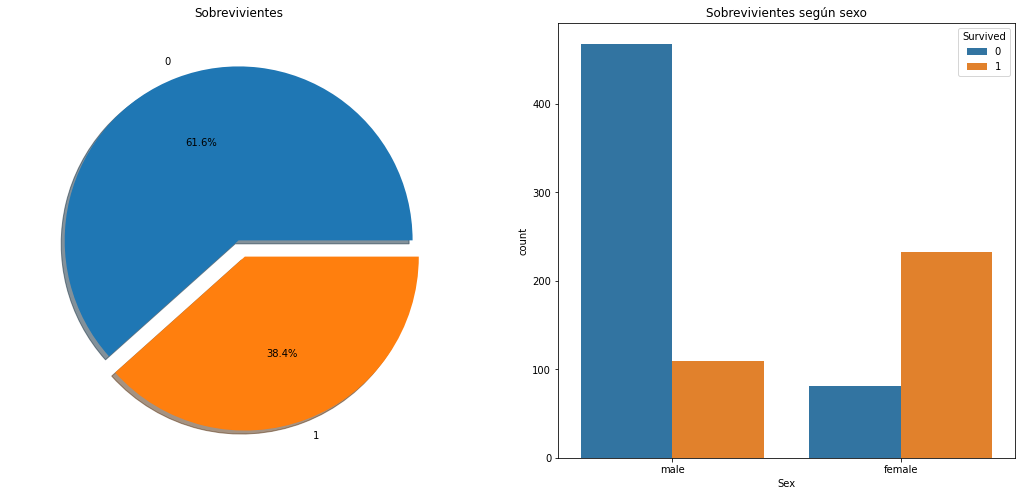

In [122]:
#generamos dos graficos en una misma fila para poder presentar información
f, ax = plt.subplots(1,2, figsize = (18,8))

#primero haremos un gráfico de torta (plot.pie) para visualizar la cantidad de sobrevivientes
df_titanic['Survived'].value_counts().plot.pie(autopct = '%1.1f%%' , ax = ax[0], explode = [0, 0.1], shadow = True)
ax[0].set_title('Sobrevivientes')
ax[0].set_ylabel(' ')
#autopct es la forma en la que se presentan los datos encotnrados, se usa %% para establecer un formato y consideramos 1 digito a la izquierda del punto
# y 1 digito a la derecha (1.1) f es un valor flotante y debe expresarse en %. Luego indico donde quiero mostrarlo, en primero de los dos recuadros

#luego haremos un gráfico de barras para visualizar la cantidad de hombres y mujeres
sns.countplot('Sex', hue ='Survived', data = df_titanic, ax = ax[1])  #indico el campo que quiero que aparezca en el eje x y con hue defino cómo agruparlo
ax[1].set_title('Sobrevivientes según sexo');

# **Análisis de Carcterísticas**



*   Variables categóricas: tiene dos o más categproías y cada valor puede clasificarse por ellas. Por ejemplo el género. No se le puede dar ningún orden. también se conocen como variables nominales. 
En nuestro dataset por ejemplo el Sexo.

*   Variables ordinales: es similar a las variables categóricas, pero a diferencia de ellas, podemos tener una ordenación u ordenación realtiva entre los valores. Por ejemplio: categoría Altura, con valores Alto, Medio y Corto.
En el dataset del Titanic, por ejemplo la Clase

*   Variable continua: las que pueden tomar valores entre dos puntos o entre los valores mínimos o máximos en la columna de características.
En nuestro dataset, la edad




# Analizando la variable categórica Sexo

In [123]:
df_titanic['PassengerId'].count()

891

In [124]:
df_titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [125]:
df_titanic.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

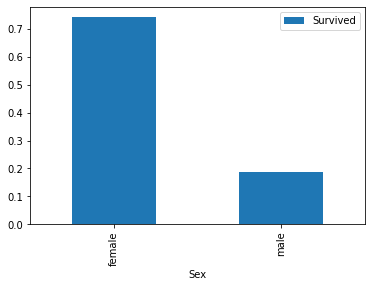

In [126]:
#Grafico con el promedio de mujeres y hombres que sobrevivieron
df_titanic[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar();

Podemos observar que más del 70% de las mujeres sobrevivieron, y sólo cerca del 20% de los hombres. 



# Analizando la variable Pclass

Vamos a compararla con nuestra variable objetivo que es la supervivencia

In [127]:
pd.crosstab( df_titanic['Pclass'], df_titanic['Survived'], margins=True).style.background_gradient(cmap= 'summer_r') #margins obtiene la suma
#0 indican las personas que murieron y 1 las que sobrevivieron

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Se puede observar que en la tercera clase hubo la mayor cantidad de muertes.

Text(0.5, 0, 'clase')

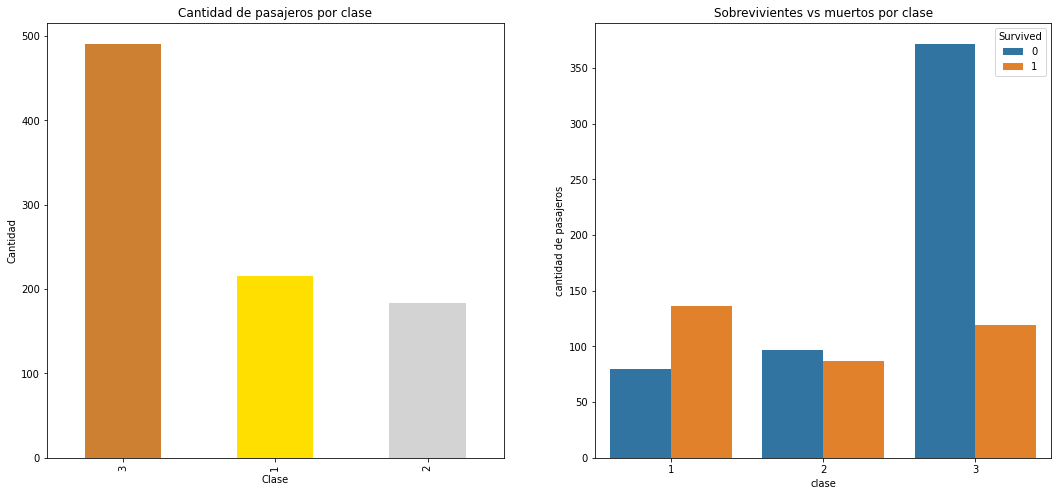

In [128]:
f, ax = plt.subplots(1,2, figsize = (18,8))

df_titanic['Pclass'].value_counts().plot.bar(ax = ax[0], color = ['#CD7F32', '#FFDF00', '#D3D3D3'])
ax[0].set_title('Cantidad de pasajeros por clase')
ax[0].set_ylabel ('Cantidad')
ax[0].set_xlabel ('Clase')

sns.countplot ('Pclass', hue='Survived', data = df_titanic , ax =ax[1])
ax[1].set_title ('Sobrevivientes vs muertos por clase')
ax[1].set_ylabel('cantidad de pasajeros')
ax[1].set_xlabel('clase')


Podemos inferir que la clase en la que viajaba la persona, sí fue determinante al momento del rescate. 


# Análisis de la tasa de supervivencia según sexo y clase

In [129]:
pd.crosstab( [df_titanic['Sex'], df_titanic['Survived']] , df_titanic ['Pclass'], margins=True).style.background_gradient(cmap= 'summer_r')

La tasa de supervivencia de las mujeres en relación al sexo y la clase, sí fueron determinantes. Siempre tuvieron prioridad al momento del rescate

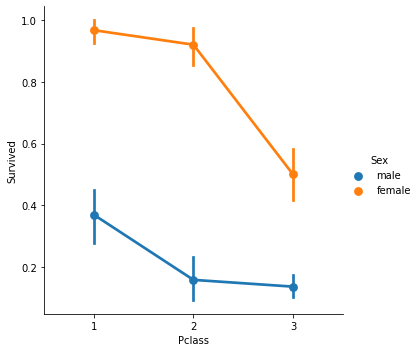

In [130]:
sns.factorplot('Pclass', 'Survived', hue ='Sex', data =df_titanic)
plt.show()

# Análisis del precio del pasaje (variable continua)

In [131]:
print ('El pasaje más caro: ', df_titanic['Fare'].max())
print ('El pasaje más barato: ', df_titanic['Fare'].min())

El pasaje más caro:  512.3292
El pasaje más barato:  0.0


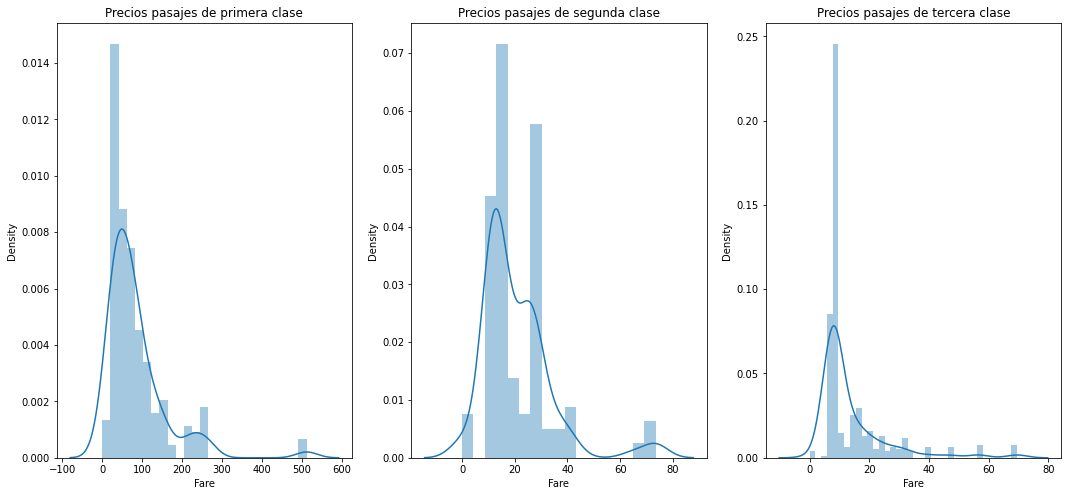

In [132]:
#usemos un gráfico de frecuencia para ver la distribución del precio según las diferentes clases
f, ax = plt.subplots(1, 3, figsize =(18, 8))

sns.distplot( df_titanic [df_titanic['Pclass'] ==1]['Fare'], ax = ax[0])
ax[0].set_title('Precios pasajes de primera clase') 

sns.distplot( df_titanic [df_titanic['Pclass'] ==2]['Fare'], ax = ax[1])
ax[1].set_title('Precios pasajes de segunda clase')

sns.distplot( df_titanic [df_titanic['Pclass'] ==3]['Fare'], ax = ax[2])
ax[2].set_title('Precios pasajes de tercera clase');

**Conclusiones**

De las variables que evaluamos, en cuanto al sexo, la probabilidad de supervivencia de las mujeres es mucho más alta en comparación de los hombres. 
A su vez, los pasajeros de primera clase tiene más probabilidad de supervivencia que los de segunda y tercera clase; incluso si este pasajero fuera mujer, la probabilidad es aún mayor, ya que sólo 3 mujeres que viajaban en primera clase no sobrevivieron.
Vemos también que la distribución de precios era exagerada entre la primera y la tercera clase. 
Por lo tanto, el sexo, la clase en la que  viajaban y el precio que se pagó del pasaje, prácticamente determinaban la supervivencia al naufragio. 


# **Limpieza de datos**



*   Convertir algunas variables continuas en rangos
*   Convertir valores String en valores numéricos
*   Eliminar características innecesarias
*   Corregir valores nulos



Problema con la variable edad: 
Para trabajar con variables continuas, se pueden establecer rangos para hacer más fácil la agrupación y sacar estadísticas adicionales. 

In [133]:
#Binning o normalization
df_titanic ['rango_de_edad'] = 0 #creamos una nueva columna en el dataset con el rango de edad 
df_titanic.loc[   df_titanic['Age']<= 16, 'rango_de_edad' ] = 0 #extraigo los registros de edad del dataset, los que son menores de 16 años, les asigno el valor 0
df_titanic.loc[  (df_titanic['Age'] >16)  & (df_titanic['Age']<= 32), 'rango_de_edad' ] = 1 
df_titanic.loc[  (df_titanic['Age'] >32)  & (df_titanic['Age']<= 48), 'rango_de_edad' ] = 2
df_titanic.loc[  (df_titanic['Age'] >48)  & (df_titanic['Age']<= 64), 'rango_de_edad' ] = 3
df_titanic.loc[  (df_titanic['Age'] >64) , 'rango_de_edad' ] = 4 

In [134]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,rango_de_edad
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


In [135]:
#comprobar la cantida de pasajeros dentro de cada rango de edad
df_titanic ['rango_de_edad'].value_counts()

1    346
0    277
2    188
3     69
4     11
Name: rango_de_edad, dtype: int64

In [136]:
df_titanic ['rango_de_edad'].value_counts().to_frame().style.background_gradient(cmap = 'summer_r')

,rango_de_edad
1,346
0,277
2,188
3,69
4,11


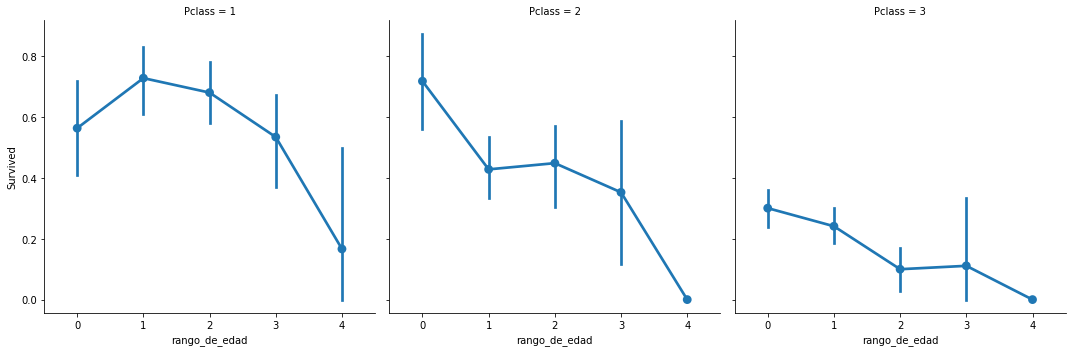

In [137]:
sns.factorplot ('rango_de_edad', 'Survived' , data = df_titanic, col = 'Pclass');

En primera clase, las personas que estaban en el tramo 0 (o sea, menores de 16 años) tenían cerca del 60% de probabilidades de sobrevivir.
En la medida que iba aumentand la edad, también aumentaba la tasa de supervivencia ( en el rango de 16 a 32 años estaba la mayor cantidad de sobrevivientes de la primera clase). 

En segunda clase, se observa una caída notoria, donde los que se priorizaron para el rescate fueron los menores de 16 años.

En tercera clase, se puede ver que todos los tramos tuvieron una tasa menor de supervivencia, pero también se priorizaron menores.


Problema con la variable Fare: también es una variable continua, y debemos convertirla a una variable ornidal. El problema es que son muy variados, entonces nos vamos a apoyar en una función de corte para que automáticamente se generen los tramos que necesitamos.

In [138]:
df_titanic['rango_pasaje'] = pd.qcut(df_titanic['Fare'], 4) #cortó el precio de los pasajes en 4 tramos

In [139]:
df_titanic.groupby(['rango_pasaje'])['Survived'].mean().to_frame().style.background_gradient(cmap = 'summer_r') #calcumos el promedio del precio del pasaje en relacion la variable objetivo

,Survived
rango_pasaje,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


en los precios mas caros, es donde tenemos la maypr cantidad de inforación. Pero tal como están los datos no nos aporta mucho valor, pero podemos simplificarlo  

In [140]:
df_titanic['categoria_pasaje'] = 0
df_titanic.loc[   df_titanic['Fare']<= 7.91, 'categoria_pasaje' ] = 0 
df_titanic.loc[  (df_titanic['Fare'] >7.91)  & (df_titanic['Fare']<= 14.454), 'categoria_pasaje' ] = 1 
df_titanic.loc[  (df_titanic['Fare'] >14.454)  & (df_titanic['Fare']<= 31.0), 'categoria_pasaje' ] = 2
df_titanic.loc[  (df_titanic['Fare'] >31.0), 'categoria_pasaje' ] = 3


In [141]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,rango_de_edad,rango_pasaje,categoria_pasaje
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,"(7.91, 14.454]",1


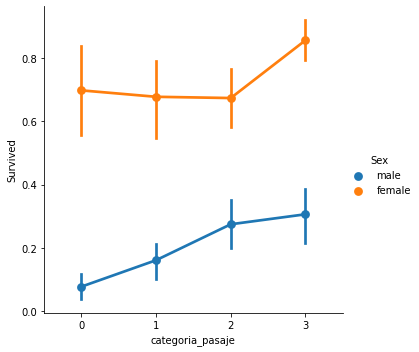

In [142]:
sns.factorplot ('categoria_pasaje', 'Survived' , data = df_titanic, hue = 'Sex');

A medida que aumenta la categoría de los pasajes, aumenta la probabilidad de supervivencia, tanto para hombres como para mujeres. 

Esto está ligado con el precio del pasaje, mientras mas caro el pasaje, más alta será la tasa de supervivencia.


**Convertir datos String a valores numéricos**

En nuestro dataset hay variables que aportan mucho valor, como el sexo y la puerta de embarque, son de tipo string y necesitamos transformarlas en valores numéricos.

In [143]:
df_titanic ['Sex'].replace(['male' , 'female'], [0, 1], inplace = True)
df_titanic ['Embarked'].replace(['S' , 'C', 'Q'], [0, 1, 2], inplace = True)

In [144]:
df_titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,rango_de_edad,rango_pasaje,categoria_pasaje
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0,1,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0,2,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1,"(7.91, 14.454]",1


**Eliminar variables innecesarias.**


PassengerId: no se puede clasificar.

Nombre: No necesitamos el nombre ya que no se puede convertir en ningún valor categórico. 

Edad: Tenemos la columna Rango_edad, por lo que no es necesaria.

Ticket: es una cadena aleatoria y no se puede clasificar.

Pasaje: Tenemos la función Categoria_Pasaje, por lo que no es necesario.

Cabina: muchos valores Nulos y también muchos pasajeros sin cabina, es una variable inútil.

Rango_pasaje : tenemos la columna categoria_pasaje.


In [145]:
df_titanic.drop(['PassengerId','Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'rango_pasaje'], axis =1, inplace = True) #axis = 1 para indicar que eliminamos columnas, no filas

In [146]:
df_titanic.head(4)

,Survived,Pclass,Sex,SibSp,Parch,Embarked,rango_de_edad,categoria_pasaje
0,0,3,0,1,0,0.0,1,0
1,1,1,1,1,0,1.0,2,3
2,1,3,1,0,0,0.0,1,1
3,1,1,1,1,0,0.0,2,3


**Tratamiento de datos nulos**



*   podemos eliminarlos
*   podemos dejarlos como están
*   podemos deducirlos


In [148]:
df_titanic.isnull().sum()

Survived            0
Pclass              0
Sex                 0
SibSp               0
Parch               0
Embarked            2
rango_de_edad       0
categoria_pasaje    0
dtype: int64

Existen dos campos nulos dentro de la puerta de embarque

In [149]:
df_titanic [ df_titanic['Embarked'].isnull()]

,Survived,Pclass,Sex,SibSp,Parch,Embarked,rango_de_edad,categoria_pasaje
61,1,1,1,0,0,NaN,2,3
829,1,1,1,0,0,NaN,3,3


Para poder predecir por qué puerta ingresaron estos dos pasajeros, deberíamos evaluar cuál fue la cantidad de psajeros que ingresó por cada una de las puertas.

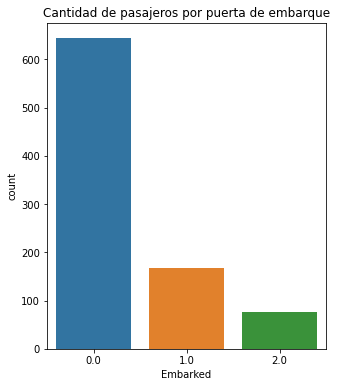

In [152]:
#Vamos a graficar la cantidad de pasajeros que pasó por cada una de las puertas
f, ax = plt.subplots(1,1, figsize = (5,6))

sns.countplot('Embarked', data = df_titanic, ax = ax) 
ax.set_title('Cantidad de pasajeros por puerta de embarque');

Si la mayoría de los pasajeros ingresaron por la puerta 0, podríamos deducir que los dos pasajeros sin puerta asignada, ingresaron por esa misma.

Vamos a completar esos datos nulos con la puerta 0.

In [154]:
df_titanic['Embarked'].fillna(0, inplace =True)

In [155]:
df_titanic.isnull().sum()  #Comprobamos que ya no haya datos nulos


Survived            0
Pclass              0
Sex                 0
SibSp               0
Parch               0
Embarked            0
rango_de_edad       0
categoria_pasaje    0
dtype: int64